In [1]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import ptitprince as pt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
plot_info = []

for root, sub_dir, files in os.walk("."):
    for file in files:
        if file.endswith(".csv"):
            try:
                src_file = file
                dim = int(file[3])
                obj = int(file[9])
                tree = file[16:].strip(".csv")
                df = pd.read_csv(src_file,index_col=0).fillna(0)
                df["dimension"] = dim
                df["n_objectives"] = obj
                df["tree"] = tree
                plot_info.append(df)
            except Exception as e:
                pass


In [3]:
new_df = pd.concat(plot_info,ignore_index=True)

In [16]:
solver = "NSGAII"
dim_n_obj_combs = [(4,3),(3,4),(2,5)]
tree = "depth"
shift_dim = True
if shift_dim:
    filtered_dfs = []
    for dim_n_obj_comb in dim_n_obj_combs:
        dimension = dim_n_obj_comb[0]
        n_objectives = dim_n_obj_comb[1]
        filtered_dfs.append(
            new_df[(new_df["solver"]==solver) & (new_df["dimension"]==dimension)&(new_df["tree"]==tree)&(new_df["n_objectives"]==n_objectives)]
        )
    filtered_df = pd.concat(filtered_dfs)
else:
    dimension = 2
    n_objectives = [3,4,5]
    filtered_df = new_df[(new_df["solver"]==solver) & (new_df["dimension"]==dimension)&(new_df["tree"]==tree)]

In [17]:
filtered_df

,solver,exp_index,root,node_1,node_2,node_3,node_4,node_5,dimension,n_objectives,tree
13952,NSGAII,32483,100,0,0,0,0,0,4,3,depth
13953,NSGAII,32484,100,0,0,0,0,0,4,3,depth
13954,NSGAII,32485,100,0,0,0,0,0,4,3,depth
13955,NSGAII,32486,100,0,0,0,0,0,4,3,depth
13956,NSGAII,32487,100,0,0,0,0,0,4,3,depth
...,...,...,...,...,...,...,...,...,...,...,...
11277,NSGAII,35031,100,0,0,0,0,0,2,5,depth
11278,NSGAII,35032,100,0,0,0,0,0,2,5,depth
11279,NSGAII,35033,98,1,1,0,0,0,2,5,depth
11280,NSGAII,35034,99,1,0,0,0,0,2,5,depth


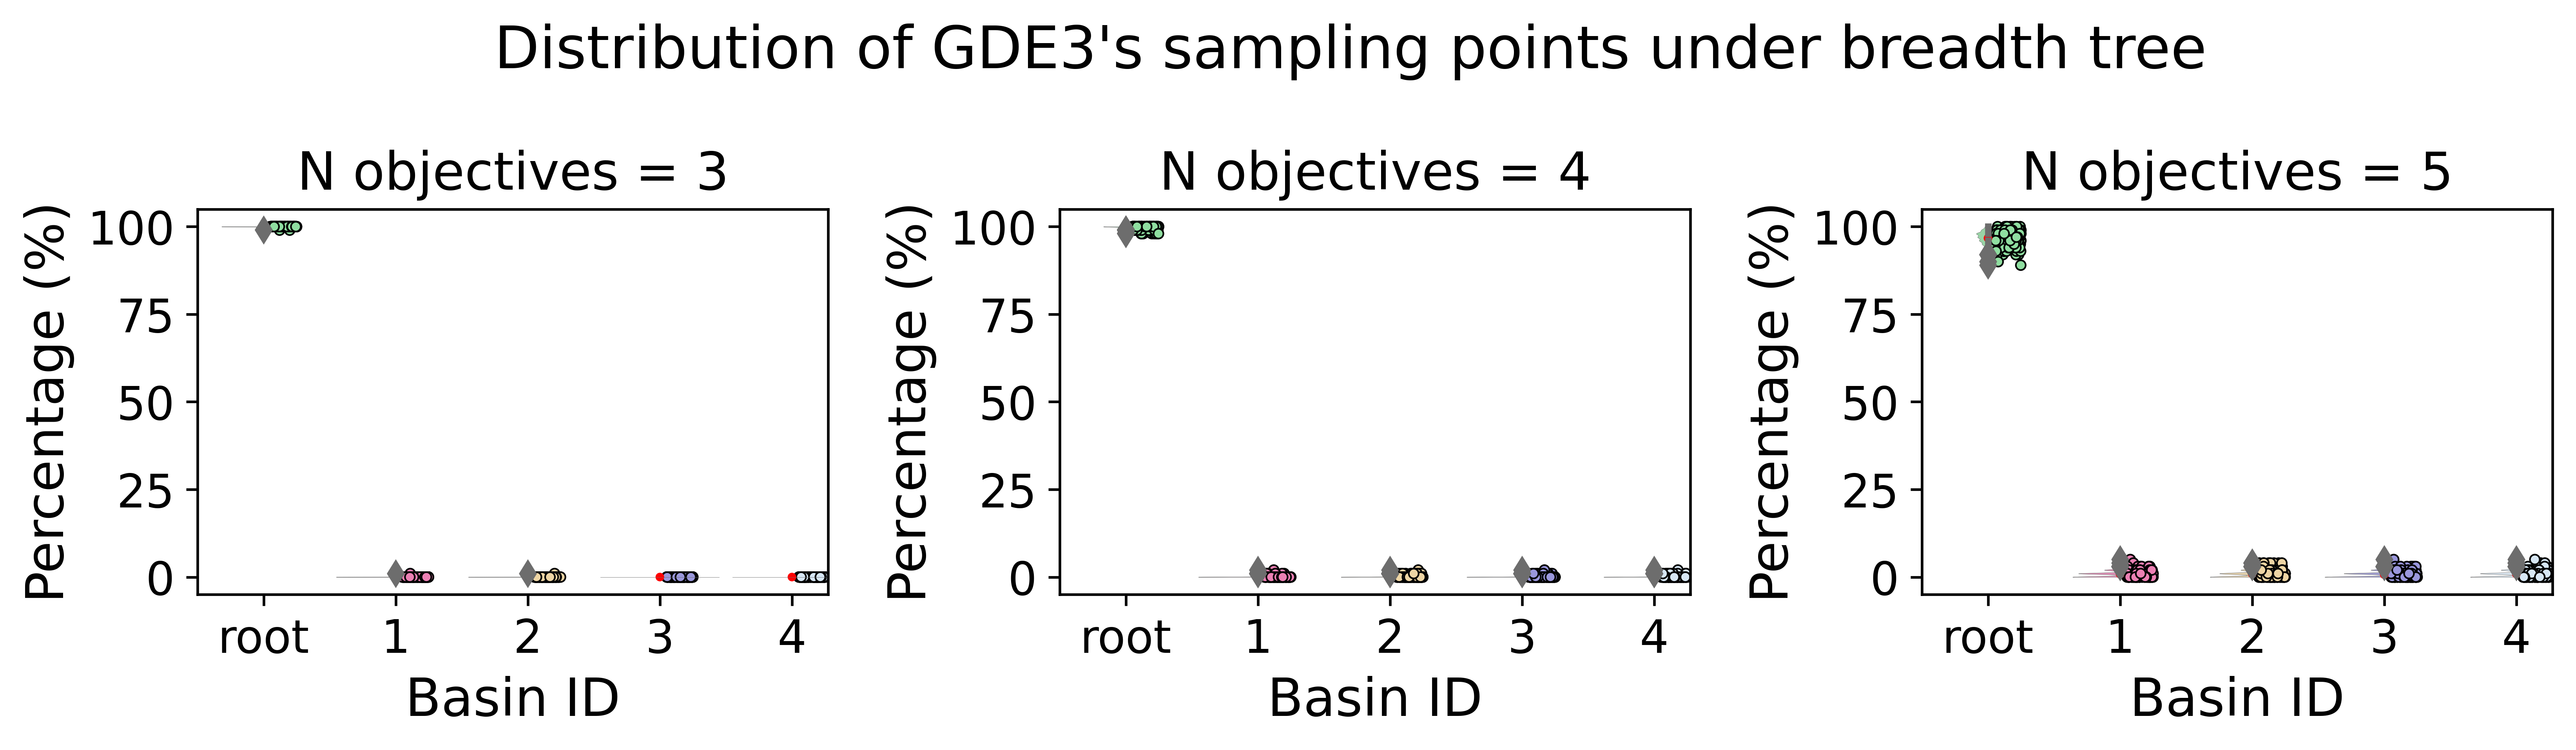

In [132]:
if solver == "MOEAD":
    solver = "MOEA/D"
if solver == "NSGAII":
    solver = "NSGA-II"

fig, axs = plt.subplots(1, 3, figsize=(11, 3),dpi=600)
fig.suptitle(f"Distribution of {solver}'s sampling points under {tree} tree",fontsize=18)
fig.tight_layout(pad=2,w_pad=4,h_pad=5)
width = 0.6
colors = ["#8fdea0","#ec80b4", "#eed5a4","#9a97dc","#d7e7f5"]
palette = sns.color_palette(colors)

for n_objective, sub_df in filtered_df.groupby("n_objectives"):
    sub_results = []
    for sub_index, row in sub_df.iterrows():
        sub_results.append({"node_name": "root", "percentage": row["root"]})
        sub_results.append({"node_name": "1", "percentage": row["node_1"]})
        sub_results.append({"node_name": "2", "percentage": row["node_2"]})
        sub_results.append({"node_name": "3", "percentage": row["node_3"]})
        sub_results.append({"node_name": "4", "percentage": row["node_4"]})
    sub_results = pd.DataFrame(sub_results)
    plt.subplot(1,3,n_objective-2)
    plt.title(f"N objectives = {n_objective}", fontsize=16)
    # pt.RainCloud(x="day", y="total_bill", data=tips, orient="v")
    # axs[plot_row,plot_col].set_xlabel("Basin name")
    # axs[plot_row,plot_col].set_ylabel("Percentage of solver instances")
    # axs[plot_row,plot_col].set_ylim([-5, 105])

    plt.ylim([-5,105])
    # plt.grid(visible=False)
    pt.RainCloud(data=sub_results, x="node_name", y="percentage", orient="v", width_viol=0.9,linewidth=0.1,point_size=3,
             rain_edgecolor='black', rain_linewidth=0.5, rain_alpha=1,move = 0.15,width_box=0,box_linewidth=0,offset=-0.0,pointplot=True, point_linestyles='', point_scale=0.3, palette=palette)
    plt.xlabel("Basin ID", fontsize=16)
    plt.ylabel("Percentage (%)", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.savefig(f"{solver}_{tree}{'_shifted' if shift_dim else ''}.pdf", format="pdf", bbox_inches="tight")
plt.savefig(f"{solver}_{tree}{'_shifted' if shift_dim else ''}.png")




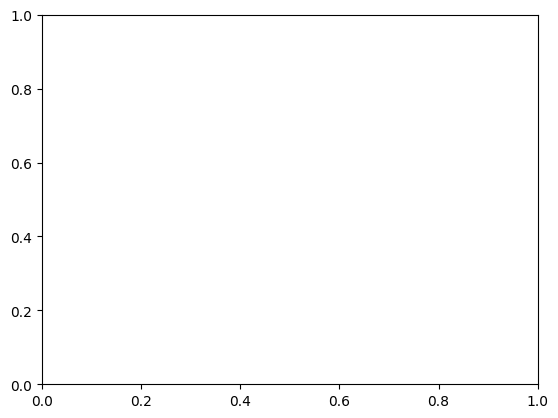

In [19]:
# Mass plot
for solver in ["GDE3", "NSGAII","IBEA"]:
    for tree in ["breadth", "depth"]:
        dim_n_obj_combs = [(4,3),(3,4),(2,5)]
        shift_dim = False
        if shift_dim:
            filtered_dfs = []
            for dim_n_obj_comb in dim_n_obj_combs:
                dimension = dim_n_obj_comb[0]
                n_objectives = dim_n_obj_comb[1]
                filtered_dfs.append(
                    new_df[(new_df["solver"]==solver) & (new_df["dimension"]==dimension)&(new_df["tree"]==tree)&(new_df["n_objectives"]==n_objectives)]
                )
            filtered_df = pd.concat(filtered_dfs)
        else:
            dimension = 2
            n_objectives = [3,4,5]
            filtered_df = new_df[(new_df["solver"]==solver) & (new_df["dimension"]==dimension)&(new_df["tree"]==tree)]

        if solver == "MOEAD":
            solver_name = "MOEA/D"
        elif solver == "NSGAII":
            solver_name = "NSGA-II"
        else:
            solver_name = solver

        fig, axs = plt.subplots(1, 3, figsize=(11, 3),dpi=600)
        fig.suptitle(f"Distribution of {solver_name}'s sampling points under {tree} tree",fontsize=18)
        fig.tight_layout(pad=2,w_pad=4,h_pad=5)
        width = 0.6
        colors = ["#8fdea0","#ec80b4", "#eed5a4","#9a97dc","#d7e7f5"]
        palette = sns.color_palette(colors)

        for n_objective, sub_df in filtered_df.groupby("n_objectives"):
            sub_results = []
            for sub_index, row in sub_df.iterrows():
                sub_results.append({"node_name": "root", "percentage": row["root"]})
                sub_results.append({"node_name": "1", "percentage": row["node_1"]})
                sub_results.append({"node_name": "2", "percentage": row["node_2"]})
                sub_results.append({"node_name": "3", "percentage": row["node_3"]})
                sub_results.append({"node_name": "4", "percentage": row["node_4"]})
            sub_results = pd.DataFrame(sub_results)
            plt.subplot(1,3,n_objective-2)
            plt.title(f"N objectives = {n_objective}", fontsize=16)
            # pt.RainCloud(x="day", y="total_bill", data=tips, orient="v")
            # axs[plot_row,plot_col].set_xlabel("Basin name")
            # axs[plot_row,plot_col].set_ylabel("Percentage of solver instances")
            # axs[plot_row,plot_col].set_ylim([-5, 105])

            plt.ylim([-5,105])
            # plt.grid(visible=False)
            pt.RainCloud(data=sub_results, x="node_name", y="percentage", orient="v", width_viol=0.9,linewidth=0.1,point_size=3,
                    rain_edgecolor='black', rain_linewidth=0.5, rain_alpha=1,move = 0.15,width_box=0,box_linewidth=0,offset=-0.0,pointplot=True, point_linestyles='', point_scale=0.3, palette=palette)
            plt.xlabel("Basin ID", fontsize=16)
            plt.ylabel("Percentage (%)", fontsize=16)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
        plt.savefig(f"mass_{solver_name}_{tree}{'_shifted' if shift_dim else ''}.pdf", format="pdf", bbox_inches="tight")
        plt.savefig(f"mass_{solver_name}_{tree}{'_shifted' if shift_dim else ''}.png")
        plt.close('all')  # Closes all open figures
        plt.clf()  # Clears the current figure (if one exists)
        plt.cla()  # Clears the current axes (if any exist)
